In [1]:
import os
import glob
import sys
import tensorflow as tf

from scipy import misc
import numpy as np
from tensorflow import image
from utils import scoring_utils
from utils import data_iterator
from utils import plotting_tools 
from utils import model_tools
from segment_net.network import KerasWrapper
from segment_net.train import score_networks
from segment_net.flags import FLAGS

In [2]:
model = KerasWrapper(name='fcn', path='./ckpt/fcn/')

INFO:tensorflow:Restoring parameters from ./ckpt/fcn/segment-499


In [3]:
def eval_dir(name):
    sample_eval = './datasets/sample_evaluation_data'
    output_dir = './evaluation/fc_baseline'
    return os.path.join(sample_eval, name), os.path.join(output_dir, name)

In [4]:
val_with_targ, pred_with_targ = model_tools.tf_pred(model, *eval_dir('patrol_with_targ')) 
val_no_targ, pred_no_targ = model_tools.tf_pred(model, *eval_dir('patrol_non_targ')) 
val_following, pred_following = model_tools.tf_pred(model, *eval_dir('following_images'))

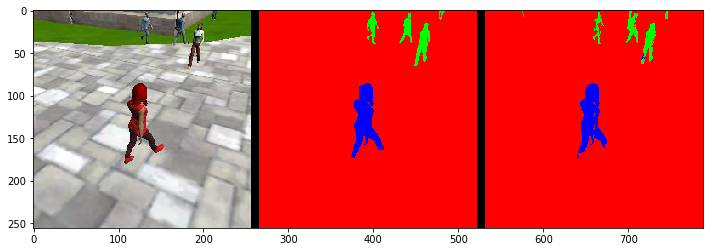

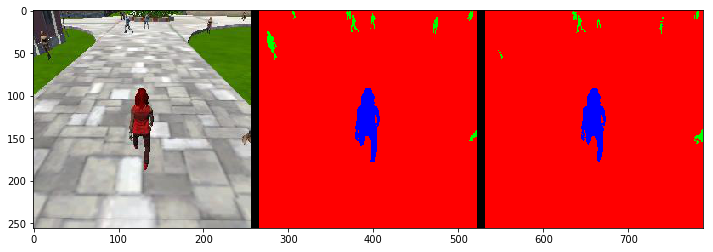

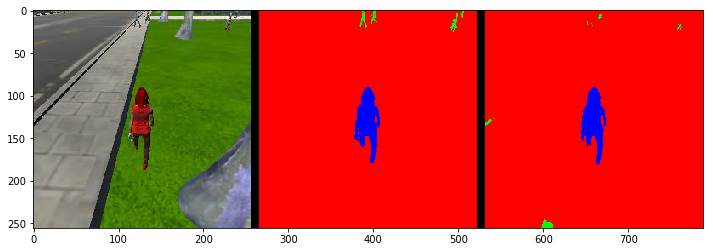

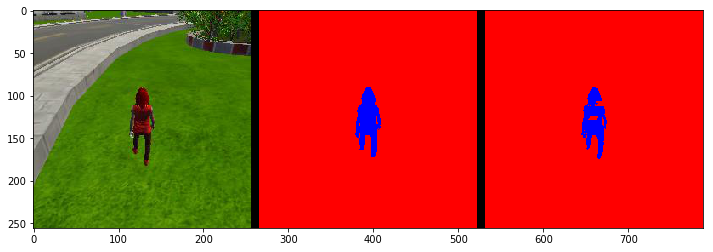

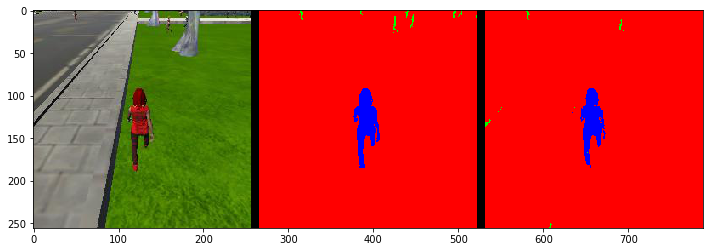

In [5]:
# images while following the target
im_files = plotting_tools.tf_sample(
    './datasets/sample_evaluation_data','following_images', './evaluation/fc_baseline/') 
for i in range(5):
    im_tuple = plotting_tools.load_images(im_files[i])
    plotting_tools.show_images(im_tuple)
    

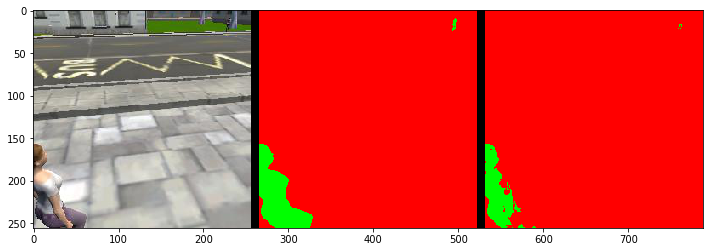

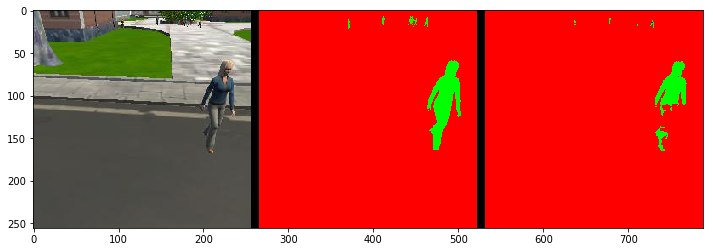

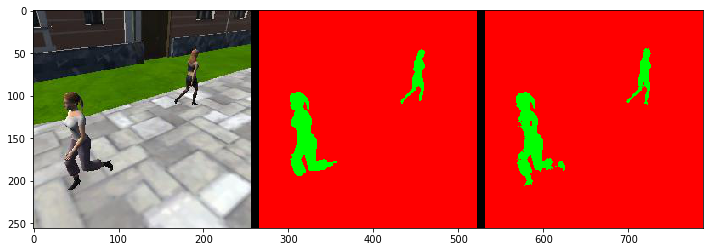

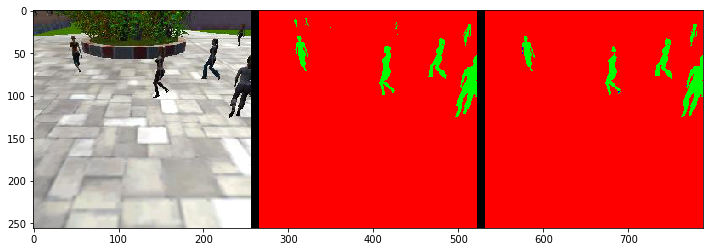

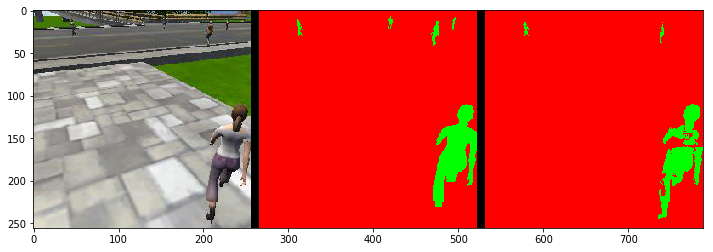

In [6]:
# images while at patrol without target
im_files = plotting_tools.tf_sample(
    './datasets/sample_evaluation_data','patrol_non_targ', './evaluation/fc_baseline/') 
for i in range(5):
    im_tuple = plotting_tools.load_images(im_files[i])
    plotting_tools.show_images(im_tuple)

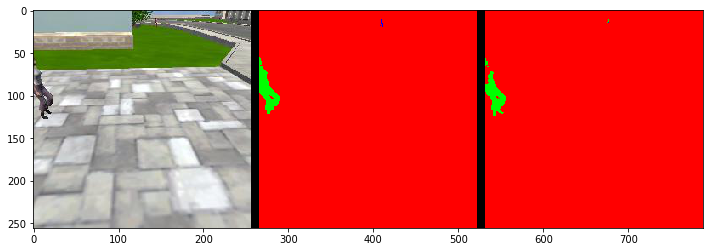

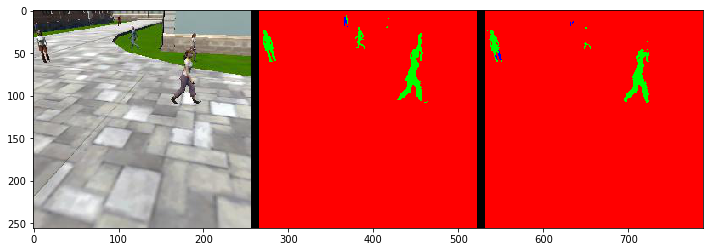

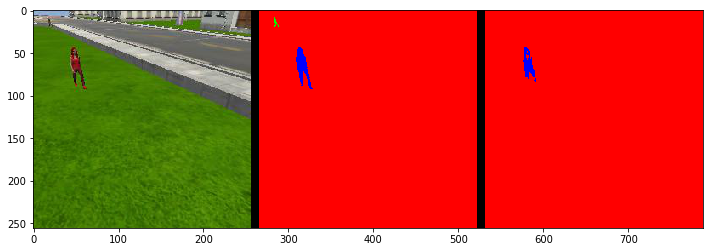

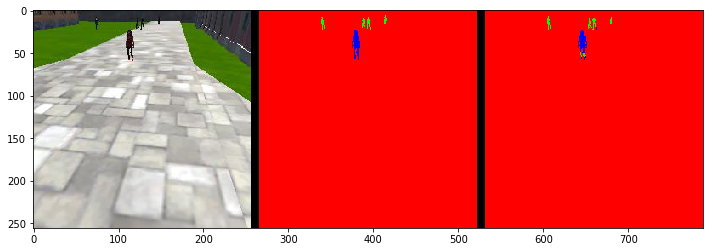

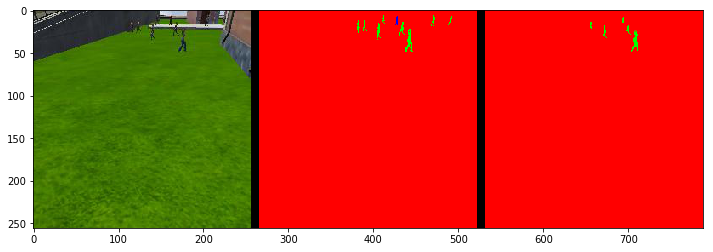

In [7]:
# images while at patrol with target
im_files = plotting_tools.tf_sample(
    './datasets/sample_evaluation_data','patrol_with_targ', './evaluation/fc_baseline/') 
for i in range(5):
    im_tuple = plotting_tools.load_images(im_files[i])
    plotting_tools.show_images(im_tuple)

In [8]:
# Scores for while the quad is following behind the target. 
true_pos1, false_pos1, false_neg1, iou1 = scoring_utils.score_run_iou(val_following, pred_following)

number of validation samples intersection over the union evaulated on 542
average intersection over union for background is 0.9960922910313622
average intersection over union for other people is 0.3932644295507493
average intersection over union for the hero is 0.9039131474669039
number true positives: 539, number false positives: 0, number false negatives: 0


In [9]:
# Scores for images while the quad is on patrol and the target is not visable
true_pos2, false_pos2, false_neg2, iou2 = scoring_utils.score_run_iou(val_no_targ, pred_no_targ)

number of validation samples intersection over the union evaulated on 270
average intersection over union for background is 0.9891175357065138
average intersection over union for other people is 0.78320080506339
average intersection over union for the hero is 0.0
number true positives: 0, number false positives: 109, number false negatives: 0


In [10]:
# This score measures how well the neural network can detect the target from far away
true_pos3, false_pos3, false_neg3, iou3 = scoring_utils.score_run_iou(val_with_targ, pred_with_targ)

number of validation samples intersection over the union evaulated on 322
average intersection over union for background is 0.9967709250955898
average intersection over union for other people is 0.5047531818793337
average intersection over union for the hero is 0.3546776945545615
number true positives: 222, number false positives: 2, number false negatives: 90


In [11]:
# Sum all the true positives, etc from the three datasets to get a weight for the score
true_pos = true_pos1 + true_pos2 + true_pos3
false_pos = false_pos1 + false_pos2 + false_pos3
false_neg = false_neg1 + false_neg2 + false_neg3

weight = true_pos/(true_pos+false_neg+false_pos)
print(weight)

0.7910602910602911


In [12]:
# The IoU for the dataset that never includes the hero is excluded from grading
final_IoU = (iou1 + iou3)/2
print(final_IoU)

0.629295421011


In [13]:
print(iou1, iou3)

0.903913147467 0.354677694555


In [14]:
# And the final grade score is 
final_score = final_IoU * weight
print(final_score)

0.497810618908
